# 2D Regression with a Two-Layer Neural Network

We'll implement a script to regress 1D data using a two-layer dense neural network.

## Load Data

We load the data using the function `load_data()` contained in `loader.py`.

In [1]:
from loader import load_data

(x, y_gt) = load_data(filename="data_reg_2d_linear.csv")

print("x:", x)
print("y_gt:", y_gt)

x: [[-0.01264992 -0.85443355]
 [ 0.76032383 -0.97434942]
 [ 0.01950686  0.27497154]
 [-1.58945469 -1.54899742]
 [-0.4683091   0.04368673]
 [-0.07725676  0.35296562]
 [-0.88869315  0.9471676 ]
 [-0.28959776 -0.32629691]
 [-0.3686084   0.77991726]
 [-0.01630287  0.69537186]
 [ 1.04251786  0.30325747]
 [-1.02762036  0.28614963]
 [ 1.35221365  0.00522689]
 [ 1.11043191  0.06395982]
 [ 0.20114065 -0.72740412]
 [-0.5236721   1.02450951]
 [-0.74496852  0.76759749]
 [-0.34330278  1.47764927]
 [-1.48967134  0.66148164]
 [ 0.91347373  0.20379262]
 [-1.04925868 -0.70112109]
 [ 1.47620376  0.38821102]
 [ 0.16479918 -0.08658965]
 [-0.88185459 -0.33227438]
 [-0.08707602 -0.18477628]
 [ 1.34159875  1.94937676]
 [-0.32110135  1.54589904]
 [ 2.40018166 -0.03238685]
 [-1.00355408  0.07884853]
 [ 0.48644429  0.64149119]
 [ 0.49777571 -0.98064575]
 [ 0.96754236  1.76567471]
 [-1.05642191 -1.36633827]
 [ 1.00046248  0.80779301]
 [ 0.48090259  1.32363817]
 [-0.93721223 -1.31488225]
 [-0.7783187  -1.1272839 

## Visualize Data

We visualize the data using the function `plot_data_2d()` contained in `plotting.py`.

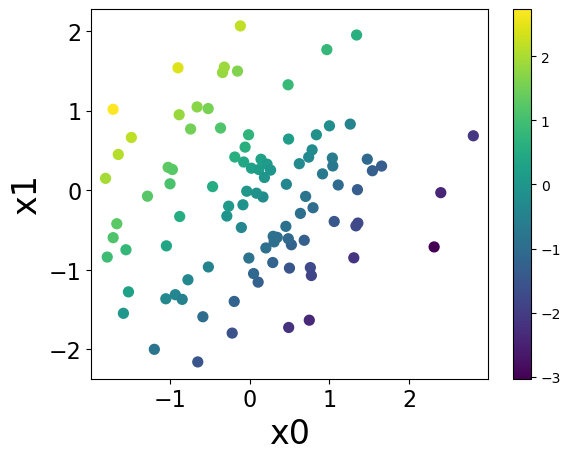

In [2]:
from plotting import plot_data_2d

plot_data_2d(x, y_gt)

## Neuron

We now create a two-layer neural network and randomly initialize it.

In [3]:
from numpy.random import default_rng

rng = default_rng()

def sigmoid(x):
    from numpy import exp
    return 1 / (1 + exp(-x))

num_neurons = 3

wa = rng.standard_normal(size=(2, num_neurons)) # input weights layer 1
wb = rng.standard_normal(size=(num_neurons, 1)) # input weights layer 2 (output)

y_p = sigmoid(x @ wa) @ wb # note linear output

**Note**

The calculation of `y_p` can be made more explicit:

```python
x_a = x # input layer 1
p_a = x_a @ wa # activation potential layer 1
y_a = sigmoid(p_a) # output layer 1

x_b = y_a # input layer 2 (output neuron)
p_b = x_b @ wb # activation potential layer 2 (output neuron)
y_b = p_b # (linear) output layer 2 (output neuron)

y_p = y_b
```

We now plot its predictions using the function `plot_pred_2d` from `plotting.py`.

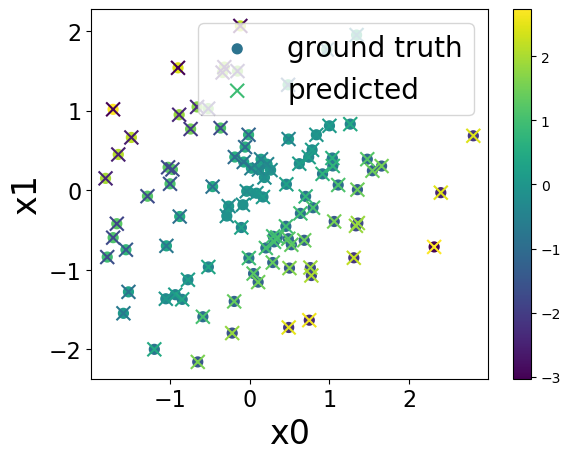

In [4]:

from plotting import plot_pred_2d

plot_pred_2d(x, y_gt, y_p)


## Training

We now train the neural network...

In [5]:
from numpy import reshape, transpose, sum

def d_sigmoid(x):
    return sigmoid(x) * (1 - sigmoid(x))
	
num_samples = len(x)
num_train_iterations = 10**5
eta = .1 # learning rate

for i in range(num_train_iterations):
	selected = rng.integers(0, num_samples) # select a random sample
	x_selected = reshape(x[selected], (1, -1))
	y_gt_selected = reshape(y_gt[selected], (1, -1))

	x_selected_a = x_selected # input layer 1
	p_a = x_selected_a @ wa # activation potential layer 1
	y_selected_a = sigmoid(p_a) # output layer 1
	
	x_selected_b = y_selected_a # input layer 2 (output neuron)
	p_b = x_selected_b @ wb # activation potential layer 2
	y_selected_b = p_b # output neuron layer 2

	y_p_selected = y_selected_b
	
	error = y_p_selected - y_gt_selected

	delta_b = error * 1 # update weights layer 2
	wb -= eta * delta_b * transpose(x_selected_b)

	delta_a = sum(wb * delta_b, axis=1) * d_sigmoid(p_a) # update weights layer 1
	wa -= eta * delta_a * transpose(x_selected_a)

	if i%100 == 0:
		print(f"i={i} error = {error[0, 0]:.2f}")

i=0 error = -1.20
i=100 error = -0.47
i=200 error = -0.20
i=300 error = -0.02
i=400 error = -0.05
i=500 error = 0.27
i=600 error = -0.07
i=700 error = 0.13
i=800 error = 0.07
i=900 error = -0.05
i=1000 error = 0.02
i=1100 error = -0.01
i=1200 error = 0.06
i=1300 error = -0.11
i=1400 error = 0.33
i=1500 error = 0.12
i=1600 error = 0.04
i=1700 error = 0.11
i=1800 error = 0.07
i=1900 error = -0.20
i=2000 error = -0.01
i=2100 error = 0.09
i=2200 error = 0.02
i=2300 error = 0.50
i=2400 error = 0.07
i=2500 error = 0.19
i=2600 error = 0.07
i=2700 error = -0.03
i=2800 error = 0.19
i=2900 error = 0.05
i=3000 error = -0.07
i=3100 error = 0.02
i=3200 error = -0.00
i=3300 error = -0.01
i=3400 error = 0.12
i=3500 error = -0.00
i=3600 error = -0.12
i=3700 error = 0.05
i=3800 error = 0.07
i=3900 error = -0.10
i=4000 error = -0.06
i=4100 error = 0.04
i=4200 error = 0.01
i=4300 error = 0.04
i=4400 error = -0.06
i=4500 error = 0.09
i=4600 error = 0.02
i=4700 error = 0.02
i=4800 error = -0.02
i=4900 erro

... and plot its performance, again using the function `plot_pred_1d` from `plotting.py`.

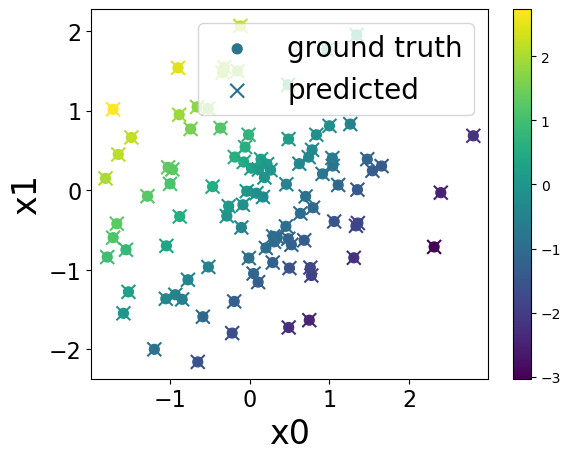

In [6]:
y_p_trained = sigmoid(x @ wa) @ wb

plot_pred_2d(x, y_gt, y_p_trained)

## Testing

We now check how the trained neuron works on the test data.

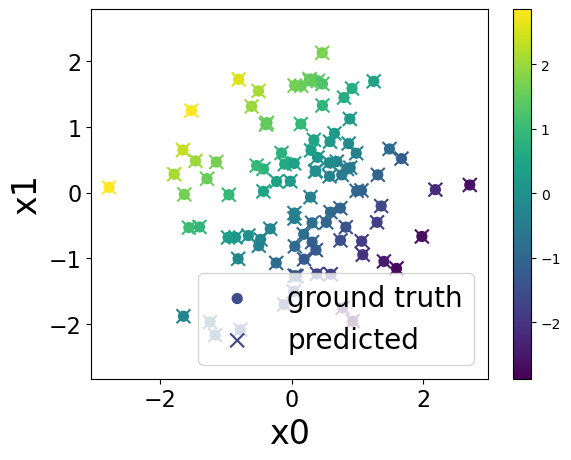

In [7]:
(x_test, y_gt_test) = load_data(filename="data_reg_2d_linear_test.csv")

y_p_trained_test = sigmoid(x_test @ wa) @ wb

plot_pred_2d(x_test, y_gt_test, y_p_trained_test)